Created by: Jacqueline Parks

IST 718 Group Project: Trending YouTube Statistics

Due Date: 6/17/2021

In [ ]:
# Load packages used in analysis and modeling
import pandas as pd # data frame operations
import datetime
import seaborn as sns
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Read in the data set
df_us = pd.read_csv('USvideos.csv')

In [ ]:
# View top 5 observations
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Display last 5 observations
df_us.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


We see the videos published range from November 11, 2017 to May 17, 2018.

In [ ]:
# Display number of rows
print("Rows: ", df_us.shape[0])

# and number of columns our data set contains
print("Columns: ", df_us.shape[1])

# Display the column names
print("\nFeatures: \n", df_us.columns.tolist())

# Find any missing values
print("\nMissing values: ", df_us.isnull().sum().values.sum())

# Count number of distinct observations
print("\nUnique values: \n", df_us.nunique())

Rows:  40949
Columns:  16

Features: 
 ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']

Missing values:  570

Unique values: 
 video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


Initial observations:
*   There are 40,949 rows and 16 columns.
*   Qualitative variables most important to our analysis are title, channel_title, category_id, tags, description.
*   Quantitative variables most important to our analysis are publish_time, trending_date, views, likes, dislikes, comment_count.
*   The remaining columns have no particular importance in our guided analysis.





In [ ]:
# Print data set information
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# How many unique channels are there?
df_us['channel_title'].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
Netflix                                   193
TheEllenShow                              193
                                         ... 
Storyful News                               1
misleadingsilhouette                        1
Ozuna                                       1
KickThePj                                   1
ClovesVEVO                                  1
Name: channel_title, Length: 2207, dtype: int64

In [ ]:
# How many unique videos are there?
df_us['video_id'].value_counts()

j4KvrAUjn6c    30
NBSAQenU2Bk    29
8h--kFui1JA    29
iILJvqrAQ_w    29
t4pRQ0jn23Q    29
               ..
waRVWv_UDCk     1
k3tWCZu42PQ     1
pi0ePRY7TSc     1
uyl6WtHEYOQ     1
z7WjD5G5ZuY     1
Name: video_id, Length: 6351, dtype: int64

In [ ]:
# Row counts in each category
df_us['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

Additional data set observations:
*   Category_id 24 has the maximum number of videos
*   There are 2,207 unique channels
*   There are 6,351 unique videos

In [ ]:
# Select and order the top n entries
df_us.nlargest(10,'views') # n=10

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37531,VYOjWnS4cMY,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",200820941,4714942,316129,491005,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37333,VYOjWnS4cMY,18.27.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",196222618,4656929,311042,485797,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37123,VYOjWnS4cMY,18.26.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",190950401,4594931,305435,479917,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36913,VYOjWnS4cMY,18.25.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",184446490,4512326,298157,473039,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36710,VYOjWnS4cMY,18.24.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",179045286,4437175,291098,466470,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


# Data Pre-Processing

In [ ]:
# Transforming publish_time to datetime
publish_time = pd.to_datetime(df_us.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create Variable publish_date
df_us['publish_date'] = publish_time.dt.date

# Drop publish_time
df_us.drop('publish_time',axis=1,inplace=True)

# Transform trending_date to datetime
df_us['trending_date'] = pd.to_datetime(df_us['trending_date'], format='%y.%d.%m').dt.date

In [ ]:
# Create New Variable Counting Days to Achieving Trending Status
df_us['days_to_trending'] = (df_us.trending_date - df_us.publish_date).dt.days
df_us.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40949.000000
mean        16.810423
std        146.014303
min          0.000000
5%           1.000000
25%          3.000000
50%          5.000000
75%          9.000000
95%         17.000000
max       4215.000000
Name: days_to_trending, dtype: float64

Missing Values

In [ ]:
# Missing Values
df_us.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
publish_date                0
days_to_trending            0
dtype: int64

In the US data set, description is missing 570 observations missing.

In [ ]:
# One way to fill in the missing descriptions is to add statement "No description provided".
df_us.description.fillna('No description provided',inplace=True) 
df_us.dropna(axis=0,inplace=True)

In [ ]:
# Various counts of videos in each channel category
df_us.groupby("channel_title").size().reset_index(name="views") \
    .sort_values("views", ascending=False).head(20)

,channel_title,views
555,ESPN,203
1785,The Tonight Show Starring Jimmy Fallon,197
1943,Vox,193
1271,Netflix,193
1804,TheEllenShow,193
1753,The Late Show with Stephen Colbert,187
889,Jimmy Kimmel Live,186
1009,Late Night with Seth Meyers,183
1556,Screen Junkies,182
1239,NBA,181


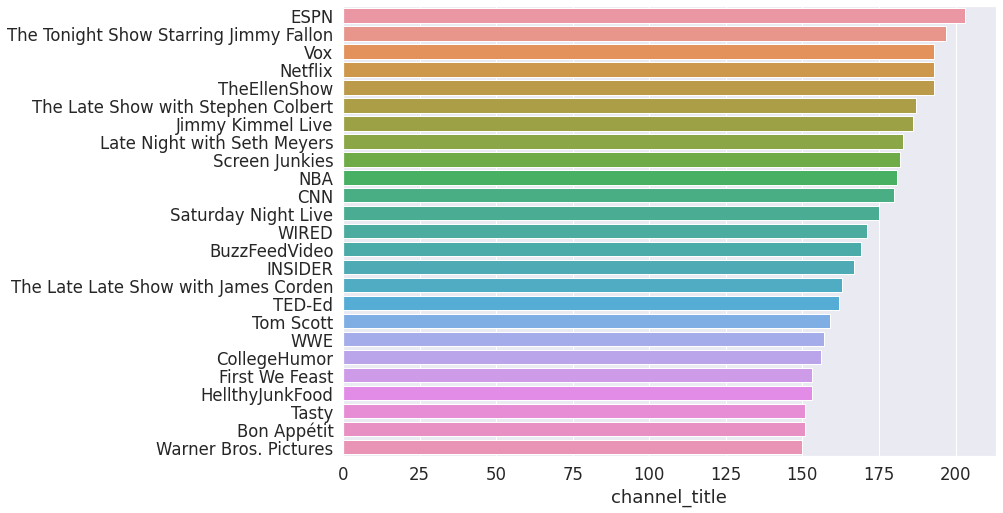

In [ ]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df_us.channel_title.value_counts()[:25]
_ = sns.barplot(y=tmp.index,x=tmp)

In [ ]:
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [ ]:
df_category =pd.DataFrame(category,columns=['category_id','category_title']) 
df_category.head(20)

,category_id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [ ]:
df_category.category_id=df_category.category_id.astype('int64')
# Merge df_us and df_category to get category names
df_merge = df_us.merge(df_category, on = 'category_id', how = 'inner')
df_merge['category_title']

0        People & Blogs
1        People & Blogs
2        People & Blogs
3        People & Blogs
4        People & Blogs
              ...      
40944             Shows
40945             Shows
40946             Shows
40947             Shows
40948             Shows
Name: category_title, Length: 40949, dtype: object

In [ ]:
agg_func_count = {'views': ['count', 'nunique', 'size']}
df_merge.groupby(['category_title']).agg(agg_func_count)

views              
                      count nunique  size
category_title                           
Autos & Vehicles        384     384   384
Comedy                 3457    3450  3457
Education              1656    1652  1656
Entertainment          9964    9918  9964
Film & Animation       2345    2341  2345
Gaming                  817     816   817
Howto & Style          4146    4136  4146
Music                  6472    6464  6472
News & Politics        2487    2479  2487
Nonprofits & Activism    57      57    57
People & Blogs         3210    3205  3210
Pets & Animals          920     920   920
Science & Technology   2401    2397  2401
Shows                    57      57    57
Sports                 2174    2167  2174
Travel & Events         402     401   402

In [ ]:
# Find the video which has maximum view count.
df_merge[df_merge['views'].isin([df_merge.views.max()])]

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,days_to_trending,category_title
31902,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,2018-05-06,27,Music


225,211,923 views

In [ ]:
df = df_merge[["trending_date", "title", "channel_title", "category_id", "publish_date", "tags", "views", "likes", "dislikes", "comment_count", "description"]]

In [ ]:
df.tail()

,trending_date,title,channel_title,category_id,publish_date,tags,views,likes,dislikes,comment_count,description
40944,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal..."
40945,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal..."
40946,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal..."
40947,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal..."
40948,2018-06-06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1351321,22587,616,1649,"On an island full of Van Gundys, Stan gets tal..."


In [ ]:
#df_us = df[df['publish_date']>='2018-05-01']

# Text Classification

## Text Cleaning

In [ ]:
df_merge['description'] = df_merge['description'].apply(lambda x: ','.join(map(str, x)))
df_merge['tags'] = df_merge['tags'].apply(lambda x: ','.join(map(str, x)))

# Change to lowercase
df_merge['description'] = df_merge['description'].map(lambda x: x.lower())
df_merge['tags'] = df_merge['tags'].map(lambda x: x.lower())

# Remove numbers
df_merge['description'] = df_merge['description'].map(lambda x: re.sub(r'\d+', '', x))
df_merge['tags'] = df_merge['tags'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
df_merge['description']  = df_merge['description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
df_merge['tags'] = df_merge['tags'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
df_merge['description'] = df_merge['description'].map(lambda x: x.strip())
df_merge['tags'] = df_merge['tags'].map(lambda x: x.strip())

# Tokenize into words
df_merge['description'] = df_merge['description'].map(lambda x: word_tokenize(x))
df_merge['tags'] = df_merge['tags'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
df_merge['description'] = df_merge['description'].map(lambda x: [word for word in x if word.isalpha()])
df_merge['tags'] = df_merge['tags'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
df_merge['description'] = df_merge['description'].map(lambda x: [w for w in x if not w in stop_words])
df_merge['tags'] = df_merge['tags'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
df_merge['description'] = df_merge['description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
df_merge['tags'] = df_merge['tags'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
df_merge['description'] = df_merge['description'].map(lambda x: ' '.join(x))
df_merge['tags'] = df_merge['tags'].map(lambda x: ' '.join(x))

Vectorizing text features using TF-IDF

In [ ]:
# TF-IDF
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_tags = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#labels = df.category_id
#features_tags = tfidf_tags.fit_transform(df_merge.tags).toarray()
#print('Tags Features Shape: ' + str(features_tags.shape))

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
#plt.figure(figsize = (15,15))

#stopwords = set(STOPWORDS)

#wordcloud = WordCloud(
#                          background_color='darkorange',
#                          stopwords=stopwords,
#                          max_words=1000,
#                          max_font_size=120, 
#                          random_state=42
#                         ).generate(str(df_merge['tags']))

#print(wordcloud)
#fig = plt.figure(1)
#plt.imshow(wordcloud)
#plt.title("WORD CLOUD - TITLES")
#plt.axis('off')
#plt.show()

Data Analysis and Feature Exploration

In [ ]:
sel_categories = ['Entertainment', 'Music', 'Howto & Style', 'Comedy', 'Film & Animation', 
            'People & Blogs', 'Science & Technology', 'Sports', 'Gaming' , 'News & Politics', 
            'Education', 'Pets & Animals', 'Travel & Events', 'Shows', 'Nonprofits & Activism', 'Autos & Vehicles']

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'category_title')]

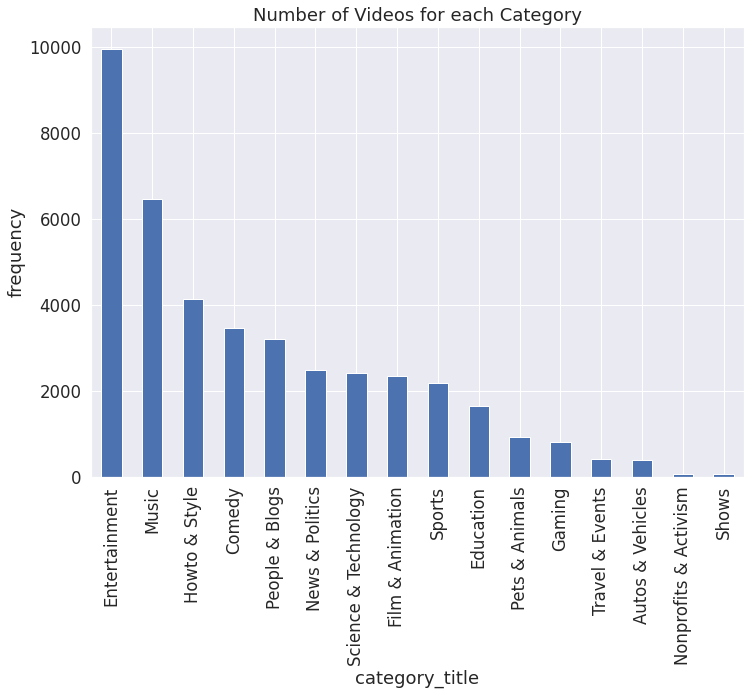

In [ ]:
# Plotting class distribution
df_merge['category_title'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number of Videos for each Category').set(xlabel='category_title', ylabel='frequency')

In [ ]:
df_tags = df_merge[['category_title','tags']]

In [ ]:
df_entertain = df_tags[df_merge.category_title == 'Entertainment']
df_entertain

,category_title,tags
3210,Entertainment,last week tonight trump presidencylast week to...
3211,Entertainment,rhett linkgmmgood mythical morningrhett link g...
3212,Entertainment,ryanhigahigatvnigahigai dare youidyrhpcdaresno...
3213,Entertainment,snlsaturday night livesnl season episode tiffa...
3214,Entertainment,walk deadshivatigerking ezekielepisode episode...
...,...,...
13169,Entertainment,abcamericanidolidolamerican idolryanseacrestry...
13170,Entertainment,voice season voice finale performanceslive fin...
13171,Entertainment,snlsaturday night livesnl season snl episode t...
13172,Entertainment,graham nortongraham norton show officialentert...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = df_merge.tags
y = df_merge.category_title
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Let's train three classifiers to try to predict the category of a video based on tags.

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=sel_categories))

accuracy 0.9163207163207163
                       precision    recall  f1-score   support

        Entertainment       1.00      0.48      0.65       117
                Music       0.99      0.93      0.96      1011
        Howto & Style       1.00      0.89      0.94       477
               Comedy       0.78      0.99      0.88      3017
     Film & Animation       1.00      0.86      0.92       713
       People & Blogs       1.00      0.78      0.88       222
 Science & Technology       0.98      0.98      0.98      1252
               Sports       0.94      0.96      0.95      1963
               Gaming       0.99      0.87      0.93       721
      News & Politics       0.00      0.00      0.00        22
            Education       0.98      0.79      0.87       994
       Pets & Animals       0.98      0.81      0.89       293
      Travel & Events       0.97      0.87      0.92       694
                Shows       1.00      0.65      0.79        17
Nonprofits & Activism     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We achieved 91.6% accuracy.

# Linear Support Vector Machine, which is regarded as one of the best text classification algorithm.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',
                alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=sel_categories))

accuracy 0.9318681318681319
                       precision    recall  f1-score   support

        Entertainment       1.00      0.83      0.91       117
                Music       0.99      0.92      0.95      1011
        Howto & Style       0.99      0.93      0.96       477
               Comedy       0.91      0.96      0.93      3017
     Film & Animation       0.99      0.86      0.92       713
       People & Blogs       1.00      0.92      0.96       222
 Science & Technology       0.96      0.98      0.97      1252
               Sports       0.96      0.96      0.96      1963
               Gaming       0.97      0.90      0.94       721
      News & Politics       1.00      0.64      0.78        22
            Education       0.72      0.89      0.80       994
       Pets & Animals       0.96      0.89      0.93       293
      Travel & Events       0.97      0.89      0.93       694
                Shows       1.00      1.00      1.00        17
Nonprofits & Activism     

We achieve a higher accuracy score of 92% which is 1% improvement over Naive Bayes.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=sel_categories))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9606837606837607
                       precision    recall  f1-score   support

        Entertainment       1.00      0.97      0.99       117
                Music       1.00      0.96      0.98      1011
        Howto & Style       1.00      0.97      0.98       477
               Comedy       0.97      0.97      0.97      3017
     Film & Animation       0.99      0.93      0.96       713
       People & Blogs       1.00      0.95      0.97       222
 Science & Technology       1.00      0.99      0.99      1252
               Sports       0.99      0.96      0.98      1963
               Gaming       0.99      0.93      0.96       721
      News & Politics       1.00      1.00      1.00        22
            Education       0.74      0.97      0.84       994
       Pets & Animals       0.98      0.93      0.95       293
      Travel & Events       0.99      0.92      0.95       694
                Shows       1.00      1.00      1.00        17
Nonprofits & Activism     

We achieve an accuracy score of 96% which is 5% higher than Naive Bayes and 4% higher than SVM.

# Making Direct Predictions

In [ ]:
nb.predict(['space'])

array(['Entertainment'], dtype='<U21')

In [ ]:
sgd.predict(['space'])

array(['Science & Technology'], dtype='<U21')

In [ ]:
logreg.predict(['space'])

array(['Science & Technology'], dtype=object)

In [ ]:
nb.predict(['keto diet'])

array(['Howto & Style'], dtype='<U21')

In [ ]:
sgd.predict(['keto diet'])

array(['Comedy'], dtype='<U21')

In [ ]:
logreg.predict(['keto diet'])

array(['News & Politics'], dtype=object)

In [ ]:
nb.predict(['deadpool 2'])

array(['Film & Animation'], dtype='<U21')

In [ ]:
sgd.predict(['deadpool 2'])

array(['Film & Animation'], dtype='<U21')

In [ ]:
logreg.predict(['deadpool 2'])

array(['Film & Animation'], dtype=object)